## Numerical analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Lesson 1
### Finds binary


In [2]:
my_num = 0.5
import struct
bits = ''.join(bin(byte).replace('0b', '').rjust(8, '0') for byte in struct.pack('!d', my_num))
print(bits)

0011111111100000000000000000000000000000000000000000000000000000


In [3]:
def split_bits(bit_64):
    exp_bit = bit_64[1:12]
    mantisa_bit = bit_64[12:]
    
    return exp_bit, mantisa_bit

In [4]:
def exponent(exp_bits):
    exp = 0
    exp_bits = exp_bits
    b = 2
    count = 0
    for i in exp_bits[::-1]:


        exp += int(i) * (b**count)
        count += 1


    return 2**(exp - 1023)

In [5]:
def mantisa(mantisa_bits):
    mantisa_bits = mantisa_bits
    mantisa = 1
    count = 1

    for i in mantisa_bits:

        mantisa += int(i) * 2**(-count)
        count += 1
    return mantisa

In [6]:
def decimal_num(bit_64):
    exp_bits,mantisa_bits =  split_bits(bit_64)
    return exponent(exp_bits) * mantisa(mantisa_bits)

decimal_num('0011111111100000000000000000000000000000000000000000000000000000')

0.5

### Derivatives

if we decrease the magnitude of $h$ by a factor $n$, then the error of the `forward_derivative` and `backward_derivative` methods also decreases by a factor $n$, but the error of the `central_derivative` method decreases by a factor $n^2$. We say that the `forward_derivative` and `backward_derivative` methods have an error of order $\mathcal{O}(h)$, whereas the `central_derivative` method has an error of order $\mathcal{O}(h^2)$. 

For sufficiently small $h$, the `central_derivative` method will therefore tend to be preferable. However, keep in mind that when $h$ becomes too small, numerical round-off errors start to dominate.

In [7]:
def forward_derivative(f, x, h=0.1):
    """df = forward_derivative(f, x, h).
    Calculates the forward difference approximation of the
    function f(x).
    """
    df = (f(x + h) - f(x)) / h
    return df

def backward_derivative(f, x, h=0.1):
    """df = forward_derivative(f, x, h).
    Calculates the backward difference approximation of the
    function f(x).
    """
    df = (f(x) - f(x - h)) / h
    return df


def central_derivative(f, x, h=1e-8):
    """df = central_derivative(f, x, h).
    Calculates the central difference approximation of the
    function f(x).
    """
    df = (f(x + h) - f(x - h)) / (2 * h)
    return df

In [8]:
def central_derivative2(f, x, h= 1e-8 ):
    """df = central_derivative2(f, x, h).
    Calculates the second-order derivative of the
    function f(x).
    """
    ddf = (f(x + h) - 2* f(x) + f(x - h) ) / (h * h)
    return ddf

def central_derivative3(f, x, h= 1e-8 ):# do not know if it is correct
    """df = central_derivative2(f, x, h).
    Calculates the second-order derivative of the
    function f(x).
    """
    dddf = 6*(  f(x + h) - f(x) - central_derivative(f, x) - (1/2)*central_derivative2(f, x)*(h**2) ) / (h * h * h)
    return dddf

### Lesson 2: Integration

### Trapezoid

In [9]:
def trapezoid(f, a, b, n=1000):
    """df = trapezoid(f, a, b, n=...).
    Calculates the definite integral of the function f(x)
    from a to b using the composite trapezoidal rule with
    n subdivisions (with default n=...).
    """
    h = (b - a ) / n
    I  = f(a) + f(b) / 2
    for i in range(1, n-1):
        xi = a + i * h 
        I += f(xi)
    I *= h 
    return I 

In [10]:
# Recurcive
def trapezoid(f, a, b, tol=1e-8):
    """df = trapezoid(f, a, b, tol=...).
    Calculates the definite integral of the function f(x)
    from a to b using the recursive trapezoidal rule with
    an absolute tolerance tol (with default 1e-8).
    """
    h = (b - a) # Interval size
    panels = 1 # No. of intervals
    I_old = (f(a)+f(b)) * h/2 
    
    while True:
        h /= 2
        panels *= 2

        I_new = 0.5 * I_old + sum(f(a +i*h) for i in range(1, panels, 2)) * h
        
        
        if abs(I_new - I_old) < tol:
            return I_new
        else:
            I_old = I_new

### Simpson

In [11]:
def simpson(f, a, b, n=100):
    """df = simpson(f, a, b, n=...).
    Calculates the definite integral of the function f(x)
    from a to b using the composite Simpson's
    rule with n subdivisions (with default n=...).
    """
    
    n += n % 2 # force to be even
    
    h = (b -a) / n 
    
    I = f(a) + f(b)
    
    for i in range(1, n, 2):
        xi = a + i*h
        I += 4*f(xi)
        
    for i in range(2, n, 2):
        xi = a + i*h
        I += 2*f(xi)
    I *= h/3
    
    return I

### Romberg

In [12]:
def romberg(f, a, b, tol = 1e-8):
    """df = simpson(f, a, b, tol=...).
    Calculates the definite integral of the function f(x)
    from a to b using Romberg integration based on the
    trapezoidal rule until a specified tolerance tol is
    reached (with default tol=...).
    """
    h = (b - a) # Interval size
    n = 1 # No. of intervals
    Rold = [ (f(a)+f(b)) * h/2 ]
    
    while True:
        h /= 2
        n *= 2 
        Rnew = [ 0.5 * Rold[0] + sum(f(a +o*h) for o in range(1, n, 2)) * h  ]
        factor = 1
        for R in Rold:
            factor *= 4
            Rnew.append( (factor*Rnew[-1] - R) / (factor-1) )
            
        if abs(Rnew[-1] - Rold[-1]) < tol:
            return Rnew[-1]
        Rold = Rnew

#### by hand

In [57]:
def f(x):
    return x**2 

R00 = (f(0) + f(1)) * 1/2
print(R00)
R10 = (1/2)*R00 + f(1/2)* (1/2)
print(R10)
R20 = (1/2)*R10 +  (f(1/4) + f(3/4)) *(1/4)
print(R20)
R30 = (1/2)*R20 + (f(1/8) + f(3/8) + f(5/8) + f(7/8)) * 1/8
print(R30)
R11 = (4*R10 -R00)/ 3
print(R11)
R21 = (4*R20 -R10)/ 3
print(R21)
R31 = (4*R30 -R20)/ 3
print(R31)
R22 = (16*R21 -R11)/ 15
print(R22)
R32 = (16*R31 -R21)/ 15
print(R32)
R33 = (64*R32 -R22)/ 63
print(R33)

0.5
0.375
0.34375
0.3359375
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333


# Lesson 3
### Finds all the roots

In [13]:
def rootsearch(f, a, b, steps):
    """lo, hi = rootsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the roots of f(x).
    """
    h = (b - a) / steps
    f_lo = f(a)
    for step in range(steps):
        lo = a + step * h
        hi = lo + h
        f_hi = f(hi)
        if f_lo * f_hi <= 0.0:
            yield lo, hi
        f_lo = f_hi

### Close up:
 ### Regula falsi

In [14]:
def regula_falsi(f, a, b, tol=1e-8, maxiter = 50):
    """
    """
    fa = f(a)
    if fa == 0:
        return a, fa
    
    fb = f(b)
    if fb == 0:
        return b, fb
    
    if fa * fb > 0.0:
        raise ValueError('Root is not bracketed')
    # as long as difference between my x values is bigger than the tolerance:
    
    while maxiter > 0:
        maxiter -= 1
        #calculate an new xn value
        xn = (a * fb - b * fa) / (fb - fa)
        fxn = f(xn)
        #print(fa, fxn, fb)

        if fxn == 0:
            return xn, fxn
        
        elif abs(fxn) < tol:
            return xn, fxn
        
        else:
            if (fxn * fa) > 0:
                a, fa = xn, fxn

            elif (fxn * fb) > 0:
                b, fb = xn, fxn

            else:
                print('bad')
    print('no root found with given maximal number of iterations')

### Ridder

In [15]:

def ridder(f,a,b,tol=1.0e-9):
    
    lo, f_lo = a, f(a)
    if f_lo == 0.0:
        return lo
    hi, f_hi = b, f(b)
    if f_hi == 0.0:
        return hi
    if f_lo * f_hi > 0.0:
        raise ValueError('Root is not bracketed')
        
    while abs(hi - lo) > tol:
        mid = (hi + lo) / 2.0
        f_mid = f(mid)
        
        s= np.sqrt(f_mid**2 - f_lo*f_hi)
        if s == 0.0:
            return None
        dx = (mid - lo)*f_mid/s
        if (f_lo - f_hi) < 0.0:
            dx = -dx
        x = mid + dx
        fx = f(x)
        if (f_mid * fx > 0):
            if (f_lo * fx < 0):
                hi = x
                f_hi = f(hi)
            else:
                lo = x
                f_lo = f(lo)
        else:
            lo, hi, f_lo, f_hi = mid, x, f_mid, fx
    return x

### Bisection

In [16]:
def bisection(f, a, b, tol=1e-4):
    """root = bisection(f, a, b, tol=...).
    Finds a root of f(x) = 0 by bisection.
    The root must be bracketed in (a,b).
    """
    count = 0
    lo, f_lo = a, f(a)
    if f_lo == 0.0:
        return lo, f_lo
    hi, f_hi = b, f(b)
    if f_hi == 0.0:
        return hi, f_hi
    if f_lo * f_hi > 0.0:
        raise ValueError('Root is not bracketed')
    while abs(hi - lo) > tol:
#         count += 1
        mid = (hi + lo) / 2.0
        f_mid = f(mid)
        if f_mid == 0.0:
            return mid, f_mid
        if (f_mid * f_hi > 0):
            hi = mid
            f_hi = f_mid
        else:
            lo = mid
            f_lo = f_mid
#     print(count) 
    return (lo + hi) / 2.0

### Secant

In [17]:
def secant(f, a, b, tol= 1e-8):
    """root = secant(f, a, b, tol=...).
    Finds a root of f(x) = 0 by the secant method.
    """
    x1 = a
    f1 = f(x1)
         
    if f1 == 0:
          return x1
        
    x2 = b
    f2 = f(x2) 
    
    if f2 == 0:
          return x2
    while abs(x2 - x1) > tol:
        x3 = (f1 *x2 - f2 *x1) / (f1 - f2)
        f3= f(x3)
        if f3 == 0:
            return x3
        
        x1 = x2
        x2 = x3
        f1 = f2
        f2 = f3
    return x2

### Newton raphson

In [18]:
# With derivative

def newton_raphson(f, df, a, b, tol=...):
    """root = newton_raphson(f, df, a, b, tol=....).
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).
    """

    x0 = (a + b) / 2
    f0 = f(x0)
    df0 = df(x0)
    while True:
        delta = f0/df0
        x1 = x0 - delta
        if abs(x1- x0) < tol:
            return x1
        x0 = x1
        f0 = f(x0)
        df0 = df(x0)

In [19]:
#without the derivative
def newton_raphson_der(f, a, b, tol=1e-4):
    """root = newton_raphson(f, df, a, b, tol=....).
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).
    """

    x0 = (a + b) / 2
    f0 = f(x0)
    df0 = central_derivative(f, x0, h=1e-6)
    while True:
        delta = f0/df0
        x1 = x0 - delta
        if abs(x1- x0) < tol:
            return x1
        x0 = x1
        f0 = f(x0)
        df0 = central_derivative(f, x0, h=1e-6)

### newton_raphson_bisection

In [20]:
def newton_raphson_bisection(f, a, b, tol=1e-8, maxiter=5):
    """root = newton_raphson(f, df, a, b, tol=....).
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).
    """
    x0 = (a+b) / 2
    f0 = f(x0)
    df0 = central_derivative(f, x0, h=1e-6)
    while (maxiter>0):
        maxiter-=1
        delta = f0 /df0
        x1 = x0 - delta
        if abs(delta) < tol:
            return x1
        x0 = x1
        f0 = f(x0)
        df0 = central_derivative(f, x0, h=1e-6)        # check whether x1 is inside or outside the brackets:
#         print(x0,f0,df0)0)

##  Lesson 4: Optimization 

#### maxima & minima

In [21]:
def minimumsearch(f, a, b, steps):
    """lo, hi = minimumsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the minima of f(x).
    """
    if steps < 2:
        steps = 2
    h = (b- a) / steps
    lo = a
    md = a + h 
    f_lo = f(lo)
    f_md = f(md)
    for i in range(2, steps +1):
        hi = a + h * i
        f_hi = f(hi)
        
        if f_md < f_lo and f_md <= f_hi:
            yield lo, hi
            
        lo, f_lo = md, f_md    
        md, f_md= hi, f_hi
        

In [22]:
def maximumsearch(f, a, b, steps):
    """lo, hi = minimumsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the minima of f(x).
    """
    if steps < 2:
        steps = 2
    h = (b- a) / steps
    lo = a
    md = a + h 
    f_lo = f(lo)
    f_md = f(md)
    for i in range(2, steps +1):
        hi = a + h * i
        f_hi = f(hi)
        
        if f_md > f_lo and f_md >= f_hi:  # if operant '>' algo finds maxima else finds minimum
            yield lo, hi
            
        lo, f_lo = md, f_md    
        md, f_md= hi, f_hi

### Close up:

### Golden search

In [23]:
from math import sqrt
# Slower than bisection
def golden_search(f, a, b, tol=1e-8):
    """minimum = golden_search(f, a, b, tol=...).
    Finds a minimum of the function f using golden
    section search, starting from bracketing values
    a and b and ending when |b-a| < tol.
    """
    factor = (3.0 - sqrt(5.0)) / 2.0

    x1 = a + factor * (b - a)
    x2 = b - factor * (b - a)
    f1 = f(x1)
    f2 = f(x2)
    while abs(b-a) > tol:
        if f1 < f2: # if operant '>' algo finds maxima else finds minimum
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + factor * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 =  b - factor * (b - a)
            f2 = f(x2)
            
            
    return (a + b) / 2.0

### Gradient search

In [24]:
# With the derivative
def gradient_search(df, x, gamma=0.1, tol=1e-8):
    """minimum = gradient_search(df, x, gamma=..., tol=...).
    Finds a minimum of the function f with derivative df
    using gradient descent with learning rate gamma,
    starting from x and ending when |df| < tol.
    """
    dof = df(x)
    new_x = x - gamma*dof
    
    while abs(dof) > tol:
        x = new_x
        dof = df(x)
        new_x = x - gamma*dof # if operant '+' it finds maxima
    return new_x

In [25]:
#Without the derivative
def gradient_search_der(f, x, gamma=0.1, tol=1e-8):
    """minimum = gradient_search(df, x, gamma=..., tol=...).
    Finds a minimum of the function f with derivative df
    using gradient descent with learning rate gamma,
    starting from x and ending when |df| < tol.
    """
    df = central_derivative(f, x)
    new_x = x - gamma*df
    
    while abs(df) > tol:
        x = new_x
        df = central_derivative(f, x)
        new_x = x - gamma*df
    return new_x

### Examples:

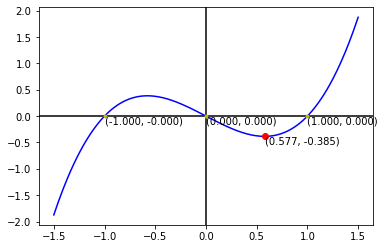

In [26]:
def f(x):
    return x**3 - x
x = np.linspace(-1.5, 1.5, 200)
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')

plt.plot(x , f(x), '-b')

# plt.axis([-6, 6, -6, 1])
for (lo, hi) in list(minimumsearch(f, -1.5, 1.5, 1000)):
    xmin = golden_search(f,lo, hi, 1e-8)
    ymin = f(xmin)
    plt.plot(xmin, ymin, 'or')
    plt.text(xmin, ymin, f'({xmin:.3f}, {ymin:.3f})', verticalalignment='top')

for (lo, hi) in list(rootsearch(f, -1.5, 1.5, 10000)):
    xmin = ridder(f,lo, hi, 1e-8)
    ymin = f(xmin)
    plt.plot(xmin, ymin, '.y')
    plt.text(xmin, ymin, f'({xmin:.3f}, {ymin:.3f})', verticalalignment='top')
    

plt.show()

### Find best fit

In [27]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 10, 100)
y = np.sin(t) + np.random.randn(100) / 10


In [28]:
def y_f(t, f):
    return np.sin(f*2* np.pi*t)

In [29]:
##### Use this func to plot the MSE JUST FOR PLOTTING
def MSE_PLOT(f):
    y_1 = []
    for fi in f:
        y_1.append((np.sum( (y - y_f(t, fi))**2 )) / 100)
    return y_1
f = np.linspace(-2,2, 500)

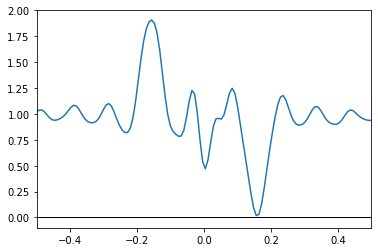

In [30]:
plt.plot(f, MSE_PLOT(f))

plt.axhline(y=0.0, linewidth=1, color='k')
plt.axis([-0.5, 0.5, -0.1, 2])
plt.show()

In [31]:
def MSE(f):
    return np.sum( (y - y_f(t, f))**2 ) / 100

f = np.linspace(0.1,0.2, 100)

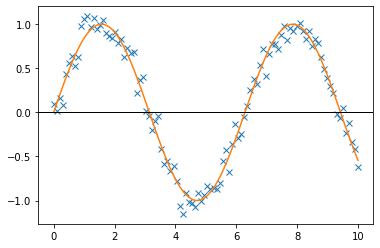

f: 0.15914967514789458


In [32]:
plt.plot(t, y, 'x')

for lo, hi in list(minimumsearch(MSE, 0.1, 0.2, 10)):
    f_0 = gradient_search_der(MSE,(lo+ hi)/2, 0.00001,  1e-8)
    
    plt.plot(t,  y_f(t, f_0)  )
plt.axhline(y=0.0, linewidth=1, color='k')
plt.show()
print('f:',gradient_search_der(MSE,(lo+hi)/2,0.00001,  1e-8))

    

## Lesson 5: Differential equesion

### Euler

In [33]:
def euler(f, y0, x0, x1, steps):
    """xs, ys = euler(f, y0, x0, x1, steps).
    Euler's method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        y = y + h * f(x, y)
        ys.append(y)
    return xs, ys

### Heun

In [34]:
def heun(f, y0, x0, x1, steps):
    """xs, ys = heun(f, y0, x0, x1, steps).
    Heun's method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        k1 = h *  f(x, y)
        k2 = h * f(x + h, y + k1 )
        y = y +  0.5 * (k1 + k2)
        ys.append(y)
    return  xs, ys

### Kutta

In [35]:
def Kutta(f, y0, x0, x1, steps):
    
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        k0 = f(x, y)
        k1 = f(x + (h/2) , y + (h/2)*k0)
        k2 = f(x + (h/2) , y + (-h)*k0 + 2*h*k1 )
        y = y + (h*(k0 + 4*k1 + k2))/ 6
        ys.append(y)
    return  xs, ys 

### Runge Kutta

In [36]:
def runge_kutta(f, y0, x0, x1, steps):
    """xs, ys = runge_kutta(f, y0, x0, x1, steps).
    4th-order Runge-Kutta method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        #Initial calculation
        k0 = h * f(x, y)
        # Middle calculations
        k1 = h * f(x + 0.5 * h, y + 0.5 *k0)
        k2 = h * f(x + 0.5 * h, y + 0.5 *k1)
        # End calculation
        k3 = h * f(x +h, y + k2)
        
        
        y = y + (k0 + 2.0 * k1 + 2.0 * k2 +k3) / 6
        ys.append(y)
    return  xs, ys

### Butcher

In [37]:
def Butcher(f, y0, x0, x1, steps):
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        k1 = f(x, y)
        k2 = f(x + (h/4), y + (h/4)*k1        )
        k3 = f(x + (h/4), y + (h/8)*(k1 + k2) ) 
        k4 = f(x + (h/2), y + (-h/2)*k2 + k3*h  )
        k5 = f(x + ((12*h)/16), y + ((3*h)/16)*k1 + ((9*h)/16)*k4      )
        k6 = f(x + h, y +h*((-3/7)*k1  + (2/7)*k2 + (12/7)*k3 + (-12/7)*k4 + (8/7)*k5))
        
        y = y + (h*(7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6))/90
        ys.append(y)
    return  xs, ys 

### Midpoint

In [38]:
def midpoint(f, y0, x0, x1, steps):
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        k1 = f(x, y)
        k2 = f(x + (h/2), y + (h/2)*k1)
        
        y = y + h*(k2)
        ys.append(y)
    return  xs, ys
    

### SSPRK3

In [39]:
def SSPRK3(f, y0, x0, x1, steps):
    
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        k0 = f(x, y)
        k1 = f(x +h, y + k0*h)
        k2 = f(x +(h/2), y + (h/4)*h)
        y = y + (h*(k0 + k1 + 4*k2))/ 6
        ys.append(y)
    return  xs, ys 

### SSPRK4

In [40]:
def SSPRK4(f, y0, x0, x1, steps):
    
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:

        k1 = f(x, y)
        k2 = f(x + (h/2), y + (h/2)*k1             )
        k3 = f(x +  h,    y + (h/2)*(k1 + k2)      )
        k4 = f(x + (h/2), y + (h/6)*(k1 + k2 + k3) )
        
        
        y = y + (h*(k1 + k2 + k3 +3.0*k4))/ 6
        ys.append(y)
    return  xs, ys

### 3/8-RULE

In [41]:
def three_eight_rule(f, y0, x0, x1, steps):
    
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        #Initial calculation
        k1 = f(x, y)
        # Middle calculations
        k2 = f(x + (h/3), y + (h/3)*k1)
        k3 = f(x + ((2*h)/3), y -h*(k1/3 - k2))
        # End calculation
        k4 = f(x +h, y + h*(k1 - k2 + k3) )
        
        
        y = y + (h*(k1 + 3.0*(k2 + k3) +k4))/ 8
        ys.append(y)
    return  xs, ys

### Ralston

In [42]:
def ralston(f, y0, x0, x1, steps):
    """y = ralston(f, y0, t, h)"""
    
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        #Initial calculation
        k1 = f(x, y)
        # Middle calculations
        k2 = f(x + ((3*h)/4), y + ((3*h)/4)*k1)

        
        
        y = y + (k1*(1/3) + k2*(2/3))*h
        ys.append(y)
    return  xs, ys

### Examples:

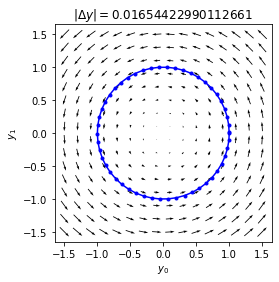

In [43]:
func = lambda x, y: np.array([-2.0 * y[1], 2.0 * y[0]])
x0, x1, y0 = 0.0, np.pi, np.array([1.0, 0.0])


grid = np.linspace(-1.5, 1.5, 16)

qx = [[func(x0, np.array([gx, gy]))[0] for gx in grid] for gy in grid]
qy = [[func(x0, np.array([gx, gy]))[1] for gx in grid] for gy in grid]

xs, ys = ralston(func, y0, x0, x1, 50)

plt.quiver(grid, grid, qx, qy, pivot='mid')
plt.plot([y[0] for y in ys], [y[1] for y in ys], '.-b')
plt.title('$|\Delta y| = {}$'.format(np.linalg.norm(ys[0]-ys[-1])));
plt.xlabel('$y_0$'); plt.ylabel('$y_1$'); plt.axis('square'); plt.show()

### Prey- Predator: 

In [44]:
def model(t, v):
    return np.array([
        ((2/3)*v[0]) - ((4/3)*v[0]*v[1]), # Prey
        (v[0]*v[1]) - v[1]                # Predator
    ])

xs, ys  = Butcher(model, np.array([3/2, 3/2]), 0, 60, 5001)

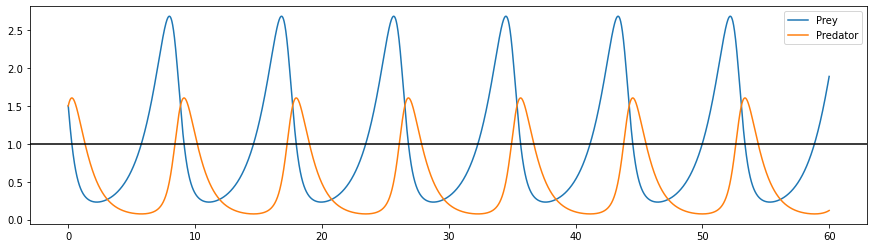

In [45]:
plt.figure(figsize=(15, 4))
plt.plot(xs, ys)
plt.legend(['Prey', 'Predator'])
plt.axhline(1, color = 'black')
plt.show()

In [46]:
# Get only one of them
def prey(b):
    prey = []
    x, res = Butcher(model, np.array([3/2, 3/2]), 0, b, 501)
    for i in range(len(res)):
        prey.append(res[i][0])
        
    return prey[::-1][0]


    

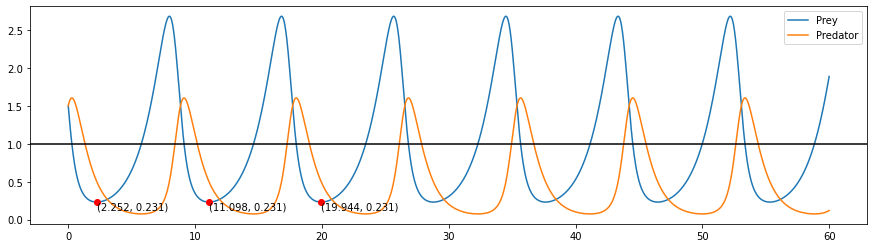

In [47]:
plt.figure(figsize=(15, 4))
plt.plot(xs, ys)



for lo, hi in list(minimumsearch(prey, 1, 20, 1000)):
    xmin = golden_search(prey, lo, hi)
    ymin = prey(xmin)
    plt.plot(xmin, ymin, 'or')
    plt.text(xmin, ymin, f'({xmin:.3f}, {ymin:.3f})', verticalalignment='top')


plt.legend(['Prey', 'Predator'])
plt.axhline(1, color = 'black')
plt.show()

### SIR Model

In [48]:
def SIR_Model(x, y):
    return np.array([
        -(0.25)*y[0]*y[1],            # Suseptible
        
        (0.25)*y[0]*y[1] - 0.10*y[1], # Infected
        
        0.10*y[1]                     # Recovered
    ])

xs, ys = Butcher(SIR_Model, np.array([0.999, 0.001, 0.000]), 0, 100, 501) 

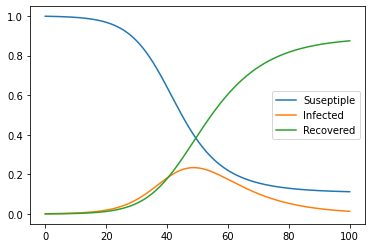

In [49]:
plt.plot(xs, ys)
plt.legend(['Suseptiple', 'Infected', 'Recovered'])
plt.show()